In [ ]:
1 IMPLEMENTATION OF TIC-TAC-TOE PROBLEM

In [1]:
import random

def print_board(board):
    """Prints the current state of the Tic-Tac-Toe board."""
    print(f" {board[0]} | {board[1]} | {board[2]} ")
    print("---|---|---")
    print(f" {board[3]} | {board[4]} | {board[5]} ")
    print("---|---|---")
    print(f" {board[6]} | {board[7]} | {board[8]} ")

def check_winner(board, player):
    """Checks if the given player has won the game."""
    # Check rows, columns, and diagonals
    winning_combinations = [
        [0, 1, 2], [3, 4, 5], [6, 7, 8],  # Rows
        [0, 3, 6], [1, 4, 7], [2, 5, 8],  # Columns
        [0, 4, 8], [2, 4, 6]              # Diagonals
    ]
    for combo in winning_combinations:
        if all(board[i] == player for i in combo):
            return True
    return False

def is_board_full(board):
    """Checks if the board is full and no more moves can be made."""
    return all(cell != ' ' for cell in board)

def play_game():
    """Main function to play Tic-Tac-Toe against the computer."""
    # Initialize the board
    board = [' '] * 9
    current_player = 'X'
    
    # Randomly choose who starts first
    first_player = random.choice(['player', 'computer'])
    if first_player == 'computer':
        print("Computer starts first:")
        computer_move(board)
        print_board(board)

    # Main game loop
    while True:
        if current_player == 'X':
            print("Your turn:")
            print_board(board)
            move = int(input("Enter your move (1-9): ")) - 1
            if move not in range(9) or board[move] != ' ':
                print("Invalid move. Please choose an empty cell.")
                continue
            board[move] = current_player
        else:
            print("Computer's turn:")
            computer_move(board)
        if check_winner(board, current_player):
            print_board(board)
            if current_player == 'X':
                print("Congratulations! You win!")
            else:
                print("Computer wins!")
            break
        elif is_board_full(board):
            print_board(board)
            print("It's a draw!")
            break
        else:
            # Switch player
            current_player = 'O' if current_player == 'X' else 'X'

def computer_move(board):
    """Computer's move: randomly chooses an empty cell."""
    empty_cells = [i for i, cell in enumerate(board) if cell == ' ']
    move = random.choice(empty_cells)
    board[move] = 'O'

# Start the game
play_game()


Your turn:
   |   |   
---|---|---
   |   |   
---|---|---
   |   |   
Enter your move (1-9): 1
Computer's turn:
Your turn:
 X |   |   
---|---|---
 O |   |   
---|---|---
   |   |   
Enter your move (1-9): 2
Computer's turn:
Your turn:
 X | X |   
---|---|---
 O |   |   
---|---|---
 O |   |   
Enter your move (1-9): 3
 X | X | X 
---|---|---
 O |   |   
---|---|---
 O |   |   
Congratulations! You win!


In [ ]:
2 IMPLEMENTATION OF 8 PUZZLE PROBLEM

In [1]:
from collections import deque

def is_valid_move(i, j):
    return 0 <= i < 3 and 0 <= j < 3

def get_possible_moves(board):
    moves = []
    for i in range(3):
        for j in range(3):
            if board[i][j] == 0:
                for dx, dy in [(0, 1), (1, 0), (-1, 0), (0, -1)]:
                    new_i, new_j = i + dx, j + dy
                    if is_valid_move(new_i, new_j):
                        new_board = [row[:] for row in board]
                        new_board[i][j], new_board[new_i][new_j] = new_board[new_i][new_j], new_board[i][j]
                        moves.append(new_board)
    return moves

def bfs(start, target):
    queue = deque([(start, [])])

    while queue:
        current, path = queue.popleft()
        if current == target:
            return path
        for move in get_possible_moves(current):
            if move not in path:
                queue.append((move, path + [move]))

    return None

if __name__ == "__main__":
    start_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
    target_state = [[1, 2, 3], [4, 5, 6], [7, 0, 8]]

    solution = bfs(start_state, target_state)
    if solution:
        print("Solution Found:")
        for i, state in enumerate(solution):
            print(f"Step {i}:")
            for row in state:
                print(row)
            print()
    else:
        print("No solution found.")


Solution Found:
Step 0:
[1, 2, 3]
[4, 5, 6]
[7, 0, 8]



In [ ]:
3 DEVELOPING AGENT PROBLEMS FOR REAL WORLD  PROBLEMS


In [9]:
import random

class Environment:
    def __init__(self, size, num_food_sources):
        self.size = size
        self.food_sources = [(random.randint(0, size-1), random.randint(0, size-1)) for _ in range(num_food_sources)]

    def regenerate_food(self):
        # Randomly add new food sources
        if random.random() > 0.95:  # 5% chance to add a new food source each step
            self.food_sources.append((random.randint(0, self.size-1), random.randint(0, self.size-1)))

    def display(self):
        grid = [[' ' for _ in range(self.size)] for _ in range(self.size)]
        for food in self.food_sources:
            grid[food[1]][food[0]] = 'F'
        for line in grid:
            print(' '.join(line))
        print("\n")

class Agent:
    def __init__(self, x, y, env):
        self.x = x
        self.y = y
        self.health = 100
        self.env = env

    def move(self):
        # Simple logic to move towards the nearest food source
        if self.env.food_sources:
            nearest_food = min(self.env.food_sources, key=lambda food: abs(food[0] - self.x) + abs(food[1] - self.y))
            self.x += 1 if nearest_food[0] > self.x else -1 if nearest_food[0] < self.x else 0
            self.y += 1 if nearest_food[1] > self.y else -1 if nearest_food[1] < self.y else 0
            # Eat food if on the same spot
            if (self.x, self.y) in self.env.food_sources:
                self.env.food_sources.remove((self.x, self.y))
                self.health += 20
        self.health -= 1  # Lose health over time

    def __repr__(self):
        return f"Agent(x={self.x}, y={self.y}, health={self.health})"

# Initialize the environment and agents
environment = Environment(10, 5)
agents = [Agent(random.randint(0, 9), random.randint(0, 9), environment) for _ in range(5)]

# Simulation loop
for _ in range(20):
    environment.display()
    print("Current agent statuses:")
    for agent in agents:
        print(agent)
    for agent in agents:
        agent.move()
    environment.regenerate_food()
    print("\n")


                   
      F            
                   
    F F       F    
                   
                  F
                   
                   
                   
                   


Current agent statuses:
Agent(x=7, y=4, health=100)
Agent(x=6, y=0, health=100)
Agent(x=9, y=3, health=100)
Agent(x=2, y=4, health=100)
Agent(x=2, y=7, health=100)


                   
      F            
                   
      F            
                   
                  F
                   
                   
                   
                   


Current agent statuses:
Agent(x=7, y=3, health=119)
Agent(x=5, y=1, health=99)
Agent(x=9, y=4, health=99)
Agent(x=2, y=3, health=119)
Agent(x=3, y=6, health=99)


                   
      F            
                   
                   
                   
                   
                   
                   
                   
                   


Current agent statuses:
Agent(x=6, y=3, health=118)
Agent(x=4, y=

In [ ]:
4 DEVELOPING BREADTH FIRST SEARCH IN REAL WORLD PROBLEMS


In [6]:
graph = {
  'A' : ['B','C'],
  'B' : ['D'],
  'C' : ['F'],
  'D' : ['E', 'F'],
  'E' : [],
  'F' : ['A']
}
 
visited = [] # Keep track of visited nodes.
queue = []   # Queue
 
def bfs(visited, graph, node):
    visited.append(node)
    queue.append(node)
    while queue:
        s = queue.pop(0) 
        print (s, end = " ") 
        for neighbour in graph[s]:
              if neighbour not in visited:
                    visited.append(neighbour)
                    queue.append(neighbour)
 
# Driver Code
bfs(visited, graph, 'A')

A B C D F E 

In [ ]:
5 DEVELOPING DEPTH FIRST SEARCH IN REAL WORLD


In [7]:
graph = {
  'A' : ['B','C'],
  'B' : ['D'],
  'C' : ['F'],
  'D' : ['E', 'F'],
  'E' : [],
  'F' : ['A']
} 
visited = set() # Keep track of visited nodes.
 
def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)
 
dfs(visited, graph, 'A')


A
B
D
E
F
C


In [ ]:
6 DEVELOPING A* ALGORITHM IN REAL WORLD PROBLEMS


In [23]:
import heapq

def astar(graph, start, goal):
    frontier = [(0, start)]  # Priority queue: (f-score, node)
    came_from = {}
    cost_so_far = {start: 0}

    while frontier:
        _, current = heapq.heappop(frontier)

        if current == goal:
            break

        for next_node in graph[current]:
            new_cost = cost_so_far[current] + graph[current][next_node]
            if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                cost_so_far[next_node] = new_cost
                priority = new_cost + heuristic(next_node, goal)
                heapq.heappush(frontier, (priority, next_node))
                came_from[next_node] = current

    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()

    return path

def heuristic(node, goal):
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

if __name__ == "__main__":
    graph = {
        (0, 0): {(0, 1): 1, (1, 0): 1},
        (0, 1): {(0, 0): 1, (0, 2): 1},
        (0, 2): {(0, 1): 1, (1, 2): 1},
        (1, 0): {(0, 0): 1, (1, 1): 1},
        (1, 1): {(1, 0): 1, (1, 2): 1},
        (1, 2): {(0, 2): 1, (1, 1): 1}
    }
    start = (0, 0)
    goal = (1, 2)
    path = astar(graph, start, goal)
    print("Path found by A* Search:")
    print(path)


Path found by A* Search:
[(0, 0), (0, 1), (0, 2), (1, 2)]


In [ ]:
7  IMPLEMENTATION OF CONSTRAINT SATIATION PROBLEMS

In [1]:
import itertools

def get_value(word, substitution):
    s = 0
    factor = 1
    for letter in reversed(word):
        s += factor * substitution[letter]
        factor *= 10
    return s

def solve2(equation):
    left, right = equation.lower().replace(' ', '').split('=')
    left = left.split('+')
    letters = set(right)
    for word in left:
        for letter in word:
            letters.add(letter)
    letters = list(letters)

    digits = range(10)
    for perm in itertools.permutations(digits, len(letters)):
        sol = dict(zip(letters, perm))

        if sum(get_value(word, sol) for word in left) == get_value(right, sol):
            print(' + '.join(str(get_value(word, sol)) for word in left) + " = {} (mapping: {})".format(get_value(right, sol), sol))


In [5]:
solve2('POINT + ZERO = ENERGY ')

98504 + 3168 = 101672 (mapping: {'n': 0, 'e': 1, 'p': 9, 'g': 7, 't': 4, 'r': 6, 'i': 5, 'z': 3, 'o': 8, 'y': 2})
24735 + 6084 = 30819 (mapping: {'n': 3, 'e': 0, 'p': 2, 'g': 1, 't': 5, 'r': 8, 'i': 7, 'z': 6, 'o': 4, 'y': 9})
38549 + 2068 = 40617 (mapping: {'n': 4, 'e': 0, 'p': 3, 'g': 1, 't': 9, 'r': 6, 'i': 5, 'z': 2, 'o': 8, 'y': 7})
31745 + 9081 = 40826 (mapping: {'n': 4, 'e': 0, 'p': 3, 'g': 2, 't': 5, 'r': 8, 'i': 7, 'z': 9, 'o': 1, 'y': 6})
42659 + 8072 = 50731 (mapping: {'n': 5, 'e': 0, 'p': 4, 'g': 3, 't': 9, 'r': 7, 'i': 6, 'z': 8, 'o': 2, 'y': 1})
58369 + 2048 = 60417 (mapping: {'n': 6, 'e': 0, 'p': 5, 'g': 1, 't': 9, 'r': 4, 'i': 3, 'z': 2, 'o': 8, 'y': 7})
51762 + 9081 = 60843 (mapping: {'n': 6, 'e': 0, 'p': 5, 'g': 4, 't': 2, 'r': 8, 'i': 7, 'z': 9, 'o': 1, 'y': 3})
62479 + 8052 = 70531 (mapping: {'n': 7, 'e': 0, 'p': 6, 'g': 3, 't': 9, 'r': 5, 'i': 4, 'z': 8, 'o': 2, 'y': 1})
74285 + 6034 = 80319 (mapping: {'n': 8, 'e': 0, 'p': 7, 'g': 1, 't': 5, 'r': 3, 'i': 2, 'z': 6,

In [ ]:
8 Implementation of uncertain methods
IMPLEMENTATION OF MINMAX ALGORITHM FOR AN APPLICATION

In [10]:
# A simple Python3 program to find
# maximum score that
# maximizing player can get
import math

def minimax (curDepth, nodeIndex,
			maxTurn, scores, 
			targetDepth):

	# base case : targetDepth reached
	if (curDepth == targetDepth): 
		return scores[nodeIndex]
	
	if (maxTurn):
		return max(minimax(curDepth + 1, nodeIndex * 2, 
					False, scores, targetDepth), 
				minimax(curDepth + 1, nodeIndex * 2 + 1, 
					False, scores, targetDepth))
	
	else:
		return min(minimax(curDepth + 1, nodeIndex * 2, 
					True, scores, targetDepth), 
				minimax(curDepth + 1, nodeIndex * 2 + 1, 
					True, scores, targetDepth))
	
# Driver code
scores = [3, 5, 2, 9, 12, 5, 23, 23]

treeDepth = math.log(len(scores), 2)

print("The optimal value is : ", end = "")
print(minimax(0, 0, True, scores, treeDepth))

# This code is contributed
# by rootshadow


The optimal value is : 12


In [ ]:
 Implementation of unification and resolution on real world 
problems.

In [11]:
def unify(x, y, theta):
    if theta is None:
        return None
    elif x == y:
        return theta
    elif isinstance(x, str) and x.islower():
        return unify_var(x, y, theta)
    elif isinstance(y, str) and y.islower():
        return unify_var(y, x, theta)
    elif isinstance(x, list) and isinstance(y, list):
        if len(x) != len(y):
            return None
        return unify(x[1:], y[1:], unify(x[0], y[0], theta))
    else:
        return None

def unify_var(var, x, theta):
    if var in theta:
        return unify(theta[var], x, theta)
    elif x in theta:
        return unify(var, theta[x], theta)
    else:
        theta[var] = x
        return theta

def resolution(clause1, clause2):
    for literal1 in clause1:
        for literal2 in clause2:
            theta = unify(literal1, negation(literal2), {})
            if theta is not None:
                new_clause = [substitute(literal, theta) for literal in clause1 if literal != literal1]
                new_clause += [substitute(literal, theta) for literal in clause2 if literal != literal2]
                return True, new_clause
    return False, None

def negation(literal):
    return literal[1:] if literal.startswith('~') else '~' + literal

def substitute(literal, theta):
    return theta.get(literal, literal)

if __name__ == "__main__":
    clause1 = ['P', '~Q', 'R']
    clause2 = ['~P', 'Q', 'S']
    resolved, new_clause = resolution(clause1, clause2)
    print("Resolution:", resolved)
    if resolved:
        print("New clause:", new_clause)


Resolution: True
New clause: ['~Q', 'R', 'Q', 'S']


In [ ]:
IMPLEMENTATION OF BLOCK WORLD PROBLEM


In [9]:
def initialize_blocks():
    return {
        'A': ['1', '2', '3'],
        'B': [],
        'C': []
    }
def move_block(state, from_stack, to_stack):
    if state[from_stack]:
        block = state[from_stack].pop()  # Remove the top block from the from_stack
        state[to_stack].append(block)    # Place it on the to_stack
        print(f"Moved block {block} from {from_stack} to {to_stack}")
    else:
        print(f"No blocks to move from {from_stack}")
def is_goal_state(state, goal_state):
    return state == goal_state
def solve_block_world():
    # Initialize blocks
    state = initialize_blocks()
    print("Initial State:", state)

    # Define the goal state for simplicity: all blocks are on stack C
    goal_state = {'A': [], 'B': [], 'C': ['1', '2', '3']}

    # Example moves to solve the problem (specific to this setup)
    move_block(state, 'A', 'C')
    move_block(state, 'A', 'B')
    move_block(state, 'C', 'B')
    move_block(state, 'A', 'C')
    move_block(state, 'B', 'A')
    move_block(state, 'B', 'C')
    move_block(state, 'A', 'C')

    print("Final State:", state)
    print("Goal Achieved:", is_goal_state(state, goal_state))

solve_block_world()


Initial State: {'A': ['1', '2', '3'], 'B': [], 'C': []}
Moved block 3 from A to C
Moved block 2 from A to B
Moved block 3 from C to B
Moved block 1 from A to C
Moved block 3 from B to A
Moved block 2 from B to C
Moved block 3 from A to C
Final State: {'A': [], 'B': [], 'C': ['1', '2', '3']}
Goal Achieved: True


In [ ]:
(K-means clustering

Centroids: [array([7.33333333, 9.        ]), array([1.16666667, 1.46666667])]
Clusters: [[[5.0, 8.0], [8.0, 8.0], [9.0, 11.0]], [[1.0, 2.0], [1.5, 1.8], [1.0, 0.6]]]
Predicted labels: [1 0 1 0 1 0]


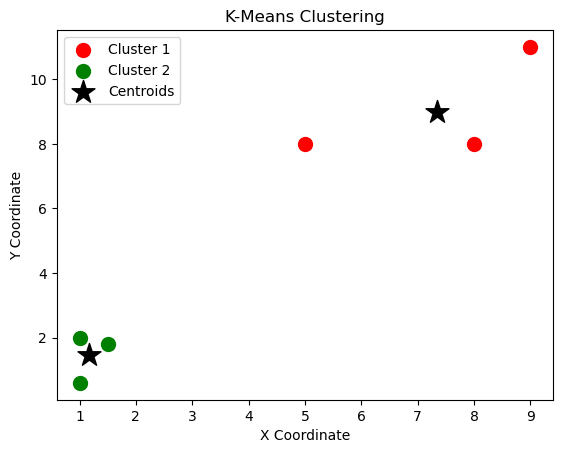

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        for _ in range(self.max_iters):
            clusters = [[] for _ in range(self.k)]
            for point in X:
                closest_centroid_idx = np.argmin([np.linalg.norm(point - centroid) for centroid in centroids])
                clusters[closest_centroid_idx].append(point)
            new_centroids = [np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)]
            if np.allclose(centroids, new_centroids):
                break
            centroids = new_centroids
        self.centroids = centroids
        self.clusters = clusters

    def predict(self, X):
        return np.array([np.argmin([np.linalg.norm(point - centroid) for centroid in self.centroids]) for point in X])

if __name__ == "__main__":
    # Example data
    X = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])

    # K-means clustering
    kmeans = KMeans(k=2)
    kmeans.fit(X)
    print("Centroids:", kmeans.centroids)
    print("Clusters:", [[list(p) for p in cluster] for cluster in kmeans.clusters])
    print("Predicted labels:", kmeans.predict(X))

    # Plotting
    colors = ['r', 'g', 'b', 'y', 'c', 'm']  # More colors for more clusters
    for i, cluster in enumerate(kmeans.clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], s=100, c=colors[i], label=f'Cluster {i+1}')
    centroids = np.array(kmeans.centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='*', label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()


In [ ]:
 K-Nearest Neighbours

In [2]:
import numpy as np
from collections import Counter

class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

if __name__ == "__main__":
    # Example data
    X_train = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])
    y_train = np.array([0, 1, 0, 1, 0, 1])
    X_test = np.array([[2, 2], [8, 9], [0, 0]])

    # K-nearest neighbors clustering
    knn = KNearestNeighbors(k=3)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    print("Predictions:", predictions)


Predictions: [0 1 0]


In [ ]:
NLP Programs
 RandomForestClassifier on SMSSpamCollection Dataset.

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

def make_batch():
    input_batch = []
    target_batch = []

    for sen in sentences:
        word = sen.split() # space tokenizer
        input = [word_dict[n] for n in word[:-1]] # create (1~n-1) as input
        target = word_dict[word[-1]] # create (n) as target, We usually call this 'casual language model'

        input_batch.append(input)
        target_batch.append(target)

    return input_batch, target_batch

# Model
class NNLM(nn.Module):
    def __init__(self):
        super(NNLM, self).__init__()
        self.C = nn.Embedding(n_class, m)
        self.H = nn.Linear(n_step * m, n_hidden, bias=False)
        self.d = nn.Parameter(torch.ones(n_hidden))
        self.U = nn.Linear(n_hidden, n_class, bias=False)
        self.W = nn.Linear(n_step * m, n_class, bias=False)
        self.b = nn.Parameter(torch.ones(n_class))

    def forward(self, X):
        X = self.C(X) # X : [batch_size, n_step, m]
        X = X.view(-1, n_step * m) # [batch_size, n_step * m]
        tanh = torch.tanh(self.d + self.H(X)) # [batch_size, n_hidden]
        output = self.b + self.W(X) + self.U(tanh) # [batch_size, n_class]
        return output

if __name__ == '__main__':
    n_step = 2 # number of steps, n-1 in paper
    n_hidden = 2 # number of hidden size, h in paper
    m = 2 # embedding size, m in paper

    sentences = ["i like dog", "i love coffee", "i hate milk"]

    word_list = " ".join(sentences).split()
    word_list = list(set(word_list))
    word_dict = {w: i for i, w in enumerate(word_list)}
    number_dict = {i: w for i, w in enumerate(word_list)}
    n_class = len(word_dict)  # number of Vocabulary

    model = NNLM()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    input_batch, target_batch = make_batch()
    input_batch = torch.LongTensor(input_batch)
    target_batch = torch.LongTensor(target_batch)

    # Training
    for epoch in range(5000):
        optimizer.zero_grad()
        output = model(input_batch)

        # output : [batch_size, n_class], target_batch : [batch_size]
        loss = criterion(output, target_batch)
        if (epoch + 1) % 1000 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

        loss.backward()
        optimizer.step()

    # Predict
    predict = model(input_batch).data.max(1, keepdim=True)[1]

    # Test
    print([sen.split()[:2] for sen in sentences], '->', [number_dict[n.item()] for n in predict.squeeze()])


ModuleNotFoundError: No module named 'torch'

In [ ]:
deep learning methods
CNN to classify Cifar-10 Images.

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 data.
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class vectors to binary class matrices (one-hot encoding).
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
])

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()







ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
 Real WordProblem(Graph coloring)

In [5]:
def addEdge(adj, v, w):
    adj[v].append(w)
    adj[w].append(v)
    return adj
def greedyColoring(adj, V):
    result = [-1] * V
    result[0] = 0;
    available = [False] * V
    for u in range(1, V):
        for i in adj[u]:
            if (result[i] != -1):
                available[result[i]] = True
                cr = 0
                while cr < V:
                    if (available[cr] == False):
                             break
                    cr += 1
                    result[u] = cr
                    for i in adj[u]:
                        if (result[i] != -1):
                            available[result[i]] = False
                            for u in range(V):
                                print("Vertex", u, " ---> Color", result[u])
if __name__ == '__main__':
    g1 = [[] for i in range(5)]
    g1 = addEdge(g1, 0, 1)
    g1 = addEdge(g1, 0, 2)
    g1 = addEdge(g1, 1, 2)
    g1 = addEdge(g1, 1, 3)
    g1 = addEdge(g1, 2, 3)
    g1 = addEdge(g1, 3, 4)
    print("Coloring of graph 1 ")
    greedyColoring(g1, 5)
    g2 = [[] for i in range(5)]
    g2 = addEdge(g2, 0, 1)
    g2 = addEdge(g2, 0, 2)
    g2 = addEdge(g2, 1, 2)
    g2 = addEdge(g2, 1, 4)
    g2 = addEdge(g2, 2, 4)
    g2 = addEdge(g2, 4, 3)
    print("\nColoring of graph 2")
    greedyColoring(g2, 5)


Coloring of graph 1 
Vertex 0  ---> Color 0
Vertex 1  ---> Color 1
Vertex 2  ---> Color -1
Vertex 3  ---> Color -1
Vertex 4  ---> Color -1
Vertex 0  ---> Color 0
Vertex 1  ---> Color 1
Vertex 2  ---> Color 1
Vertex 3  ---> Color -1
Vertex 4  ---> Color -1
Vertex 0  ---> Color 0
Vertex 1  ---> Color 1
Vertex 2  ---> Color 1
Vertex 3  ---> Color -1
Vertex 4  ---> Color -1

Coloring of graph 2
Vertex 0  ---> Color 0
Vertex 1  ---> Color 1
Vertex 2  ---> Color -1
Vertex 3  ---> Color -1
Vertex 4  ---> Color -1
Vertex 0  ---> Color 0
Vertex 1  ---> Color 1
Vertex 2  ---> Color 1
Vertex 3  ---> Color -1
Vertex 4  ---> Color -1
Vertex 0  ---> Color 0
Vertex 1  ---> Color 1
Vertex 2  ---> Color 1
Vertex 3  ---> Color -1
Vertex 4  ---> Color -1


In [ ]:
ToyproblemsCamel-Banana Problem


In [1]:
total=int(input('Enter the total no. of bananas at the start: '))
distance=int(input('Enter the distance which is to be covered: '))
load_capacity=int(input('Enter maximum load capacity of the camel: '))
lost_bananas=0
bananas=total
for i in range(distance):
    while bananas>0:
        bananas=bananas-load_capacity
        if bananas==1:
            lost_bananas=lost_bananas-1
            lost_bananas=lost_bananas+2
            lost_bananas=lost_bananas-1
            bananas=total-lost_bananas
            if bananas==0:
              break
        print(bananas)

Enter the total no. of bananas at the start: 3000
Enter the distance which is to be covered: 1000
Enter maximum load capacity of the camel: 1000
2000
1000
0


In [ ]:
best first search

In [8]:
from queue import PriorityQueue
import matplotlib.pyplot as plt
import networkx as nx

# for implementing BFS | returns path having lowest cost
def best_first_search(source, target, n):
    visited = [0] * n
    visited[source] = True
    pq = PriorityQueue()
    pq.put((0, source))
    while pq.empty() == False:
        u = pq.get()[1]
        print(u, end=" ") # the path having lowest cost
        if u == target:
            break

        for v, c in graph[u]:
            if visited[v] == False:
                visited[v] = True
                pq.put((c, v))
    print()

# for adding edges to graph
def addedge(x, y, cost):
    graph[x].append((y, cost))
    graph[y].append((x, cost))

G = nx.Graph()
v = int(input("Enter the number of nodes: "))
graph = [[] for i in range(v)] # undirected Graph
e = int(input("Enter the number of edges: "))
print("Enter the edges along with their weights:")
for i in range(e):
    x, y, z = list(map(int, input().split()))
    addedge(x, y, z)
    G.add_edge(x, y, weight = z)

source = int(input("Enter the Source Node: "))
target = int(input("Enter the Target/Destination Node: "))
print("\nPath: ", end = "")
best_first_search(source, target, v)


Enter the number of nodes: 14
Enter the number of edges: 13
Enter the edges along with their weights:
0 1 3
0 2 6
0 3 5
1 4 9
1 5 8
2 6 12
2 7 14
3 8 7
8 9 5
8 10 6
9 11 1
9 12 10
9 13 2
Enter the Source Node: 0
Enter the Target/Destination Node: 9

Path: 0 1 3 2 8 9 


In [ ]:
monty hall problem

In [10]:
import random

def monty_hall_simulation(num_trials, switch_door):
    wins = 0

    for _ in range(num_trials):
        doors = [0, 0, 1]  # 0 represents a goat, 1 represents the car
        random.shuffle(doors)

        # Contestant's initial choice
        contestant_choice = random.randint(0, 2)

        # Monty opens a door with a goat behind it
        for door in range(3):
            if door != contestant_choice and doors[door] == 0:
                monty_opened = door
                break

        # Contestant switches their choice if switch_door is True
        if switch_door:
            for door in range(3):
                if door != contestant_choice and door != monty_opened:
                    contestant_choice = door
                    break

        # Check if the contestant won
        if doors[contestant_choice] == 1:
            wins += 1

    return wins / num_trials

if __name__ == "__main__":
    num_trials = 10000
    
    # Simulate switching doors
    switch_door = True
    win_percentage_switch = monty_hall_simulation(num_trials, switch_door)
    print(f"Win percentage with switching doors: {win_percentage_switch:.2%}")
    
    # Simulate not switching doors
    switch_door = False
    win_percentage_no_switch = monty_hall_simulation(num_trials, switch_door)
    print(f"Win percentage without switching doors: {win_percentage_no_switch:.2%}")


Win percentage with switching doors: 66.72%
Win percentage without switching doors: 33.07%


In [ ]:
n queen 

In [2]:
class NQueens:
    def __init__(self, N):
        self.N = N
        self.board = [[0] * N for _ in range(N)]

    def is_safe(self, row, col):
        for i in range(col):
            if self.board[row][i] == 1:
                return False

        for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
            if self.board[i][j] == 1:
                return False

        for i, j in zip(range(row, self.N), range(col, -1, -1)):
            if self.board[i][j] == 1:
                return False

        return True

    def solve(self, col):
        if col >= self.N:
            return True

        for i in range(self.N):
            if self.is_safe(i, col):
                self.board[i][col] = 1
                if self.solve(col + 1):
                    return True
                self.board[i][col] = 0

        return False

    def print_solution(self):
        for i in range(self.N):
            for j in range(self.N):
                print(self.board[i][j], end=" ")
            print()

if __name__ == "__main__":
    N = 8  # Change N to desired board size
    n_queens = NQueens(N)
    if n_queens.solve(0):
        print(f"Solution for {N}-Queens Problem:")
        n_queens.print_solution()
    else:
        print("No solution exists for the given board size.")


Solution for 8-Queens Problem:
1 0 0 0 0 0 0 0 
0 0 0 0 0 0 1 0 
0 0 0 0 1 0 0 0 
0 0 0 0 0 0 0 1 
0 1 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 
0 0 0 0 0 1 0 0 
0 0 1 0 0 0 0 0 


In [ ]:
rule based

In [ ]:
import sys

def definiteNoun(s):
  s = s.lower().strip()
  if s in ['a', 'e', 'i', 'o', 'u', 'y']:
    return "an " + s
  else:
    return "a " + s

def removeArticle(s):
  "Remove the definite article 'a' or 'an' from a noun."
  s = s.lower().strip()
  if s[0:3] == "an ": return s[3:]
  if s[0:2] == "a ": return s[2:]
  return s

def makeQuestion(question, yes, no):
  return [question, yes, no]

def isQuestion(p):
  "Check if node is a question (with answers), or a plain answer."
  return type(p).__name__ == "list"

def askQuestion(question):
  print ("\r%s " % question,)
  return sys.stdin.readline().strip().lower()

def getAnswer(question):
  if isQuestion(question):
    return askQuestion(question[0])
  else:
    return askQuestion("Were you thinking about %s?" % definiteNoun(question))

def answeredYes(answer):
  if len(answer) > 0:
    return answer.lower()[0] == "y"
  return False

def gameOver(message):
  global tries
  print ("")
  print ("\r%s" % message)
  print ("")

def playAgain():
  return answeredYes(askQuestion("Do you want to play again?"))

def correctGuess(message):
  global tries
  gameOver(message)

  if playAgain():
    print ("")
    tries = 0
    return Q
  else:
    sys.exit(0)

def nextQuestion(question, answer):
  global tries
  tries += 1

  if isQuestion(question):
    if answer:
      return question[1]
    else:
      return question[2]
  else:
    if answer:
      return correctGuess("I knew it!")
    else:
      return makeNewQuestion(question)

def replaceAnswer(tree, find, replace):
  if not isQuestion(tree):
    if tree == find:
      return replace
    else:
      return tree
  else:
    return makeQuestion(tree[0],
      replaceAnswer(tree[1], find, replace),
      replaceAnswer(tree[2], find, replace))

def makeNewQuestion(wrongAnimal):
  global Q, tries

  correctAnimal = removeArticle(askQuestion("I give up.  What did you think about?"))

  newQuestion = askQuestion("Enter a question that would distinguish %s from %s:"
      % (definiteNoun(correctAnimal), definiteNoun(wrongAnimal))).capitalize()

  yesAnswer = answeredYes(askQuestion("If I asked you this question " +
    "and you thought about %s, what would the correct answer be?" % definiteNoun(correctAnimal)))

  # Create new question node
  if yesAnswer:
    q = makeQuestion(newQuestion, correctAnimal, wrongAnimal)
  else:
    q = makeQuestion(newQuestion, wrongAnimal, correctAnimal)
  Q = replaceAnswer(Q, wrongAnimal, q)
  tries = 0
  return Q

def addNewQuestion(wrongAnimal, newques, correct):
    global Q
    q = makeQuestion(newques, correct, wrongAnimal)
    Q = replaceAnswer(Q, wrongAnimal, q)
    return Q

tries = 0
Q = (makeQuestion('Does it have fur?', 'Tiger', 'Penguin'))
q = addNewQuestion('Tiger', 'Does it have dark spots?', 'Leopard')
q = addNewQuestion('Leopard', 'Is it the fastest animal?', 'Cheetah')
q = addNewQuestion('Penguin', 'Can it fly?', 'Parrot')
q = Q

print ("Imagine an animal.  I will try to guess which one.")
print ("You are only allowed to answer YES or NO.")
print ("")

try:
  while True:
    ans = answeredYes(getAnswer(q))
    q = nextQuestion(q, ans)
except KeyboardInterrupt:
  sys.exit(0)
except Exception:
  sys.exit(1)